# Searching with Memories.AI API

This Jupyter notebook guides you through using the Memories.AI API to search in your library at frame resolution (to obtain time-stamp), and also search using audio.

First configure the API key

In [ ]:
import requests
import os
API_KEY = ""  # Replace with your actual API key
headers = {"Authorization": API_KEY}  # API key

Use the API for upload video from platform URL to upload to your private library

In [2]:
payload={
  "video_urls": ["https://www.youtube.com/watch?v=o9vgXOH4ET0"],
  "unique_id": "default",
} 

response = requests.post(  
    "https://api.memories.ai/serve/api/v1/scraper_url",  
    json=payload,  
    headers=headers  
)  

print(response.json())  


{'code': '0000', 'msg': 'success', 'data': {'taskId': '29404cac-5089-4368-ad57-1c938b6f9fb2_99dd20a65c40386649a8781da77392a1'}, 'success': True, 'failed': False}


We can check the status of this task to see if the video is downloaded and parsed. 
When it is ready, you can take down the video's ID.

In [3]:
params = {
    "task_id": "af817b9f-3d81-4f24-80df-40397215f82e_99dd20a65c40386649a8781da77392a1",
}

response = requests.get(
    "https://api.memories.ai/serve/api/v1/get_video_ids_by_task_id",
    headers=headers,
    params=params
)

print("Status:", response.status_code)
try:
    print("Task Status Response:", response.json())
except Exception:
    print("Response Text:", response.text)

Status: 200
Task Status Response: {'code': '0000', 'msg': 'success', 'data': {'videos': [{'duration': '1487', 'size': None, 'status': 'PARSE', 'fps': None, 'width': None, 'height': None, 'video_no': 'VI625685456915968000', 'video_name': 'Top 5 Most-Watched Live Sketches | Season 50 | Saturday Night Live', 'create_time': '1758634237659', 'video_url': 'https://www.youtube.com/watch?v=o9vgXOH4ET0', 'resolution_label': None}]}, 'success': True, 'failed': False}


We illustrate how to search using a snapshot from a tiktok video which is a clip in this youtube video. Note that the picture frame is segmented compared to Youtube video frame.

The snapshot is shown below, and the video that should be searched is VI625685456915968000

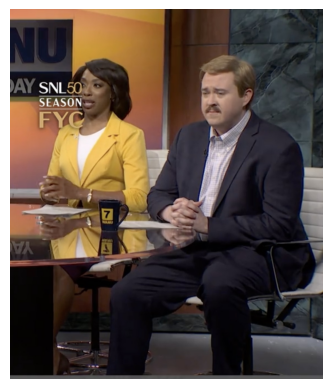

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "../image/tkframe.jpg"
img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis("off")  # hide axes
plt.show()

we then try the "search for similar "images" API, which search for this image in the whole library to find relavant video, and also list the start time for that

In [5]:
url = "https://api.memories.ai/serve/api/v1/search_similar_images"

payload = {'unique_id': 'default'}

files = [
  ("file", ("tkframe.jpg", open("../image/tkframe.jpg", "rb"), "image/jpg"))
]
response = requests.post(url, headers=headers, data=payload, files=files)
print(response.text)

{"code":"0000","msg":"success","data":[{"videoNo":"VI625685456915968000","videoName":"Top 5 Most-Watched Live Sketches | Season 50 | Saturday Night Live","startTime":"45","score":0.8744316360398937},{"videoNo":"VI625685456915968000","videoName":"Top 5 Most-Watched Live Sketches | Season 50 | Saturday Night Live","startTime":"121","score":0.87380118527077233},{"videoNo":"VI625685456915968000","videoName":"Top 5 Most-Watched Live Sketches | Season 50 | Saturday Night Live","startTime":"47","score":0.87264738426520738},{"videoNo":"VI625685456915968000","videoName":"Top 5 Most-Watched Live Sketches | Season 50 | Saturday Night Live","startTime":"268","score":0.86622699975718742},{"videoNo":"VI625685456915968000","videoName":"Top 5 Most-Watched Live Sketches | Season 50 | Saturday Night Live","startTime":"303","score":0.86620194592851096},{"videoNo":"VI625685456915968000","videoName":"Top 5 Most-Watched Live Sketches | Season 50 | Saturday Night Live","startTime":"128","score":0.86519346047

you can check in video/saturdaynight.mp4 to see if it is correct

We can also use audio to search for time stamp

In [7]:
url = "https://api.memories.ai/serve/api/v1/search_audio_transcripts"

params = {
    "page": 1,
    "page_size": 100,
    "unique_id": "default",
    "query": "And welcome back. You're watching WANU Midday News"
}

response = requests.get(url, headers=headers, params=params)
print(response.text)

{"code":"0000","msg":"success","data":{"videos":[{"videoNo":"VI625685456915968000","videoName":"Top 5 Most-Watched Live Sketches | Season 50 | Saturday Night Live","startTime":"34","audio_ts":" And welcome back. You're watching WANU Midday News."}],"current_page":1,"page_size":100,"total_count":"1"},"success":true,"failed":false}


check the audio transcriptions

In [8]:
params = {"video_no": "VI625685456915968000","unique_id": "default"}

response = requests.get("https://api.memories.ai/serve/api/v1/get_audio_transcription", headers=headers, params=params)

print("Status:", response.status_code)
try:
    print("Video Transcription Response:", response.json())
except Exception:
    print("Response Text:", response.text)

Status: 200
Video Transcription Response: {'code': '0000', 'msg': 'success', 'data': {'videoNo': 'VI625685456915968000', 'transcriptions': [{'index': 0, 'content': " I'm sorry I met someone I connected with,", 'startTime': '0', 'endTime': '3'}, {'index': 1, 'content': ' but Domingo is in the past.', 'startTime': '3', 'endTime': '5'}, {'index': 2, 'content': " Kelsey, I'm here.", 'startTime': '5', 'endTime': '6'}, {'index': 3, 'content': " See, now, if this is Domingo, I'm gonna be pissed.", 'startTime': '10', 'endTime': '12'}, {'index': 4, 'content': ' Hey, Matt. Came out this way.', 'startTime': '14', 'endTime': '16'}, {'index': 5, 'content': ' Had to explain.', 'startTime': '16', 'endTime': '18'}, {'index': 6, 'content': ' Direct from Domingo.', 'startTime': '18', 'endTime': '20'}, {'index': 7, 'content': " Kelsey's a friend. She's like my sis.", 'startTime': '20', 'endTime': '22'}, {'index': 8, 'content': ' But we did hook up, though.', 'startTime': '22', 'endTime': '24'}, {'index':